In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

from subprocess import check_output


# LOAD DATASET

In [2]:
test_df = pd.read_csv("./test.csv")
train_df = pd.read_csv("./train.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Some values in Age/Cabin/Embarked are missing

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### 0: dead 1 : survived

#### Pclass : 자리의 등급

#### Cabin : 선실 번호 

#### Embarked : 배를 탄 장소

#### SibSp : 함께 탑승한 형제 또는 배우자의 수

#### Parch : 함께 탑승한 부모 또는 자식의 수

### As train_data, age/cabin have missing parts

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### There are 1~891 ids in train
### 892~1309 in test

In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


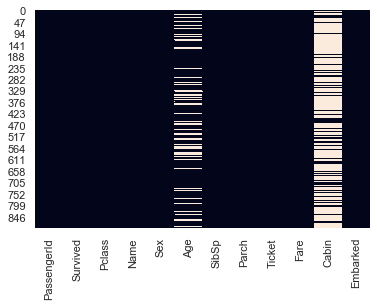

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
sns.heatmap(train_df.isnull(),cbar = False)
plt.show()
train_df.isnull()

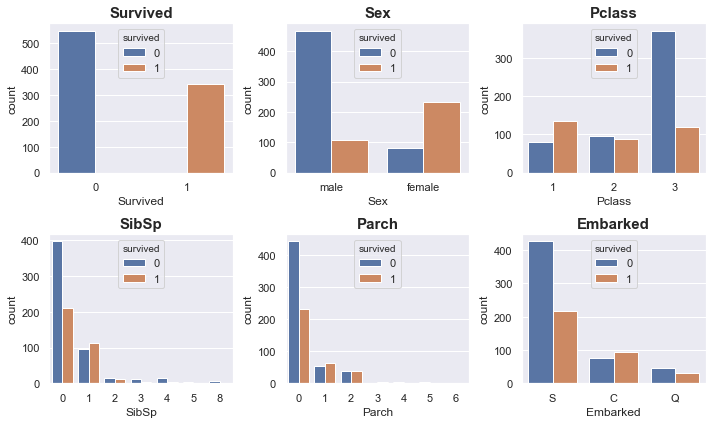

In [9]:
cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
n_rows = 2
n_cols = 3
fig, axs = plt.subplots(n_rows,n_cols, figsize = (n_rows*5,n_cols*2))
for row in range(n_rows):
    for col in range(n_cols):
        i = row*n_cols+col
        ax = axs[row][col]
        sns.countplot(train_df[cols[i]], hue=train_df["Survived"], ax=ax)
        ax.set_title(cols[i], fontsize=15, fontweight='bold')
        ax.legend(title="survived", loc='upper center') 
        
plt.tight_layout()   

As you can see above, Pcclass, SibSp, Parch, Embarked,Sex are relevant with survival

# Data preprocessing

In [10]:
train_df.isnull().sum() / len(train_df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### decision : Delete Cabin

In [11]:
del test_df["Cabin"]
del train_df["Cabin"]

#### Because test data has no survived column, 
#### we need to delete the column in train_df

In [12]:
y_train_df = train_df.pop("Survived")
train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId',inplace=True)


In [31]:

train_index = train_df.index
test_index = test_df.index

In [13]:
all_df = train_df.append(test_df)
all_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S


In [14]:
train_df.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [15]:
all_df.isnull().sum() / len(all_df)

Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.200917
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000764
Embarked    0.001528
dtype: float64

In [16]:
del all_df["Name"]
del all_df["Ticket"]
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [17]:
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,S
2,1,1,38.0,1,0,71.2833,C
3,3,1,26.0,0,0,7.9250,S
4,1,1,35.0,1,0,53.1000,S
5,3,0,35.0,0,0,8.0500,S


In [18]:
all_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
all_df["Embarked"] = all_df["Embarked"].replace({"S":0 , "C":1,"Q":0 , np.nan:99})
all_df["Embarked"].unique()

array([ 0,  1, 99], dtype=int64)

In [20]:
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked','Fare']
for col in cols:
    print(all_df.groupby(col)["Age"].mean())

Sex
0    30.585228
1    28.687088
Name: Age, dtype: float64
Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64
SibSp
0    30.921766
1    31.058071
2    23.569444
3    16.312500
4     8.772727
5    10.166667
8    14.500000
Name: Age, dtype: float64
Parch
0    31.969401
1    24.965625
2    18.975979
3    38.875000
4    47.600000
5    39.333333
6    41.500000
9          NaN
Name: Age, dtype: float64
Embarked
0     29.208233
1     32.332170
99    50.000000
Name: Age, dtype: float64
Fare
0.0000      36.875000
3.1708       9.000000
4.0125      20.000000
5.0000      33.000000
6.2375      61.000000
              ...    
227.5250    36.250000
247.5208    33.666667
262.3750    34.571429
263.0000    36.333333
512.3292    41.000000
Name: Age, Length: 281, dtype: float64


In [21]:
all_df.loc[(all_df["Pclass"] == 1) & (
        all_df["Age"].isnull()), "Age"] = 39.16
all_df.loc[ (all_df["Pclass"] == 2) & all_df["Age"].isnull() , "Age"] = 29.51
all_df.loc[ ( all_df["Pclass"] == 3) & all_df["Age"].isnull(), "Age"] = 24.81

In [22]:
all_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [23]:
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked','Age']
for col in cols:
    print(all_df.groupby(col)["Fare"].mean())

Sex
0    26.154601
1    46.198097
Name: Fare, dtype: float64
Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64
SibSp
0    25.785406
1    48.711300
2    48.940576
3    71.332090
4    30.594318
5    46.900000
8    69.550000
Name: Fare, dtype: float64
Parch
0     26.329820
1     50.078358
2     61.346275
3     86.688537
4    104.723617
5     32.356250
6     46.900000
9     69.550000
Name: Fare, dtype: float64
Embarked
0     25.636771
1     62.336267
99    80.000000
Name: Fare, dtype: float64
Age
0.17     20.575000
0.33     14.400000
0.42      8.516700
0.67     14.500000
0.75     17.430533
           ...    
70.50     7.750000
71.00    42.079200
74.00     7.775000
76.00    78.850000
80.00    30.000000
Name: Fare, Length: 101, dtype: float64


In [24]:
all_df[all_df["Fare"].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1044,3,0,60.5,0,0,NaN,0


In [25]:
print(all_df.loc[(all_df["Pclass"]==1) & (all_df["Embarked"]== 0),"Fare"].mean(),
all_df.loc[(all_df["Pclass"]==1) & (all_df["Embarked"]== 1),"Fare"].mean(),
all_df.loc[(all_df["Pclass"]==1) & (all_df["Embarked"]== 99),"Fare"].mean(),
all_df.loc[(all_df["Pclass"]==2) & (all_df["Embarked"]== 0),"Fare"].mean(),
all_df.loc[(all_df["Pclass"]==2) & (all_df["Embarked"]== 1),"Fare"].mean(),
all_df.loc[(all_df["Pclass"]==2) & (all_df["Embarked"]== 99),"Fare"].mean(),
all_df.loc[(all_df["Pclass"]==3) & (all_df["Embarked"]== 0),"Fare"].mean(),
all_df.loc[(all_df["Pclass"]==3) & (all_df["Embarked"]== 1),"Fare"].mean(),
all_df.loc[(all_df["Pclass"]==3) & (all_df["Embarked"]== 99),"Fare"].mean())

72.44562611111111 106.84533049645385 80.0 20.940645783132528 23.30059285714285 nan 13.682473146622737 11.021623762376244 nan


In [26]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 13

## Modeling

In [32]:
train_df = all_df[all_df.index.isin(train_index)]
test_df = all_df[all_df.index.isin(test_index)]


x_data = train_df.as_matrix()
y_data = y_train_df.as_matrix()

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression()

In [36]:
x_data.shape, y_data.shape

((891, 7), (891,))

In [37]:
x_data

array([[ 3.    ,  0.    , 22.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 1.    ,  1.    , 38.    , ...,  0.    , 71.2833,  1.    ],
       [ 3.    ,  1.    , 26.    , ...,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    ,  1.    , 24.81  , ...,  2.    , 23.45  ,  0.    ],
       [ 1.    ,  0.    , 26.    , ...,  0.    , 30.    ,  1.    ],
       [ 3.    ,  0.    , 32.    , ...,  0.    ,  7.75  ,  0.    ]])

In [38]:
model.fit(x_data,y_data)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
print(test_df.shape)
print(test_df.index)
x_test = test_df.as_matrix()
y_test = model.predict(x_test)
y_test

(418, 7)
Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [40]:
test_df.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [41]:
result = np.concatenate((test_df.index.values.reshape(-1,1),y_test.reshape(-1,1)),axis = 1)
result[:5]

array([[892,   0],
       [893,   0],
       [894,   0],
       [895,   0],
       [896,   1]], dtype=int64)

In [42]:
submission = pd.DataFrame(result, columns = ["PassengerId","Survived"])
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [43]:
submission.to_csv("submission.csv", index = False)